In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading in from NOAA's severe weather data inventory database
# https://www1.ncdc.noaa.gov/pub/data/swdi/database-csv/v2/

l = pd.read_csv("/Users/wltrimbl/Downloads/tvs-2022.csv", skiprows=2)

In [3]:
l

,#ZTIME,LON,LAT,WSR_ID,CELL_ID,CELL_TYPE,RANGE,AZIMUTH,AVGDV,LLDV,MXDV,MXDV_HEIGHT,DEPTH,BASE,TOP,MAX_SHEAR,MAX_SHEAR_HEIGHT
0,20220101003829,-99.69270,33.87663,KFDR,E3,TVS,46,231,37,51,53,17,10.8,5.9,16.7,19,16.7
1,20220101003829,-99.69911,33.93856,KFDR,E3,TVS,44,235,40,29,108,17,11.9,5.5,17.4,36,17.4
2,20220101004341,-99.73909,33.84483,KFDR,H3,TVS,49,231,53,41,89,8,10.1,4.3,14.4,30,8.1
3,20220101004341,-99.82962,33.86111,KFDR,H3,TVS,52,235,59,32,110,11,9.4,4.6,14.0,36,10.9
4,20220101004341,-99.68239,33.86635,KFDR,H3,TVS,46,230,43,37,92,8,6.5,3.9,10.4,32,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88173,20221231144301,-121.85501,37.21220,KMUX,P6,TVS,4,31,36,50,50,1,7.5,0.6,8.1,192,0.6
88174,20221231203808,-83.00808,27.42193,KTPA,U9,TVS,37,225,51,92,93,22,20.3,2.1,22.4,40,22.4
88175,20221231211038,-121.74425,37.29129,KMUX,V3,TVS,11,42,45,33,74,4,6.4,0.1,6.5,105,3.8
88176,20221231211038,-121.83731,37.34926,KMUX,L5,TVS,12,14,49,98,98,0,5.2,0.1,5.3,134,0.1


In [6]:
l.dtypes, len(l)

(#ZTIME                int64
 LON                 float64
 LAT                 float64
 WSR_ID               object
 CELL_ID              object
 CELL_TYPE            object
 RANGE                 int64
 AZIMUTH               int64
 AVGDV                 int64
 LLDV                  int64
 MXDV                  int64
 MXDV_HEIGHT           int64
 DEPTH               float64
 BASE                float64
 TOP                 float64
 MAX_SHEAR             int64
 MAX_SHEAR_HEIGHT    float64
 dtype: object,
 88178)

In [7]:
l["Date"] = pd.to_datetime(l["#ZTIME"])

In [8]:
l.Date

0       1970-01-01 05:37:00.101003829
1       1970-01-01 05:37:00.101003829
2       1970-01-01 05:37:00.101004341
3       1970-01-01 05:37:00.101004341
4       1970-01-01 05:37:00.101004341
                     ...             
88173   1970-01-01 05:37:01.231144301
88174   1970-01-01 05:37:01.231203808
88175   1970-01-01 05:37:01.231211038
88176   1970-01-01 05:37:01.231211038
88177   1970-01-01 05:37:01.231220515
Name: Date, Length: 88178, dtype: datetime64[ns]

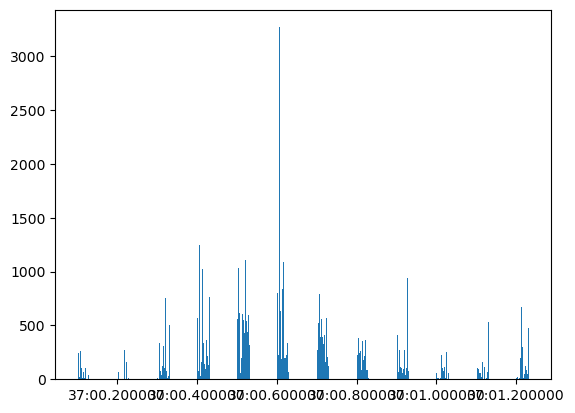

In [9]:
hist=plt.hist(l.Date, bins=900)

In [10]:
# This is data corruption, these dates are not in 1970, they are from 2022.
l["Date"] = pd.to_datetime(l["#ZTIME"], format="%Y%m%d%H%M%S")
l["Date"]

0       2022-01-01 00:38:29
1       2022-01-01 00:38:29
2       2022-01-01 00:43:41
3       2022-01-01 00:43:41
4       2022-01-01 00:43:41
                ...        
88173   2022-12-31 14:43:01
88174   2022-12-31 20:38:08
88175   2022-12-31 21:10:38
88176   2022-12-31 21:10:38
88177   2022-12-31 22:05:15
Name: Date, Length: 88178, dtype: datetime64[ns]

(array([ 3843.,  3509., 12387., 18072., 17464., 15691.,  6435.,  3918.,
         2454.,  4405.]),
 array([18993.02672454, 19029.51608333, 19066.00544213, 19102.49480093,
        19138.98415972, 19175.47351852, 19211.96287731, 19248.45223611,
        19284.94159491, 19321.4309537 , 19357.9203125 ]),
 <BarContainer object of 10 artists>)

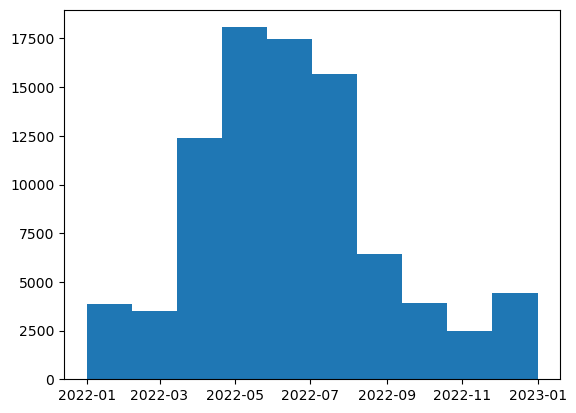

In [11]:
plt.hist(l["Date"])

(array([2512.,  882.,  449.,  764.,  934., 1811., 4580., 5315., 2492.,
        3912., 6614., 7546., 7687., 7343., 2434., 6431., 6173., 3087.,
        2194., 1910., 2331., 1183., 1465., 1270.,  510., 1389.,  555.,
         948., 2141., 1316.]),
 array([18993.02672454, 19005.18984414, 19017.35296373, 19029.51608333,
        19041.67920293, 19053.84232253, 19066.00544213, 19078.16856173,
        19090.33168133, 19102.49480093, 19114.65792052, 19126.82104012,
        19138.98415972, 19151.14727932, 19163.31039892, 19175.47351852,
        19187.63663812, 19199.79975772, 19211.96287731, 19224.12599691,
        19236.28911651, 19248.45223611, 19260.61535571, 19272.77847531,
        19284.94159491, 19297.10471451, 19309.2678341 , 19321.4309537 ,
        19333.5940733 , 19345.7571929 , 19357.9203125 ]),
 <BarContainer object of 30 artists>)

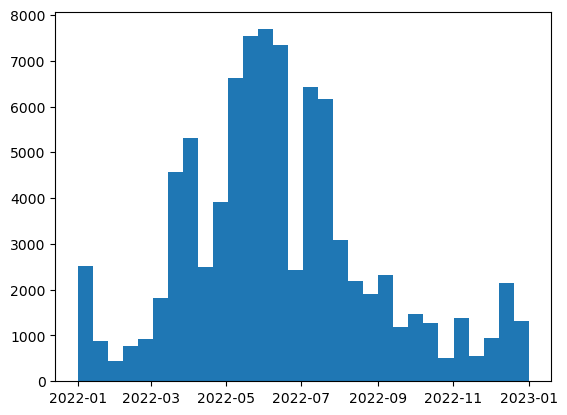

In [12]:
plt.hist(l["Date"], bins=30)

(array([1.243e+03, 2.650e+02, 1.700e+01, 4.600e+01, 8.050e+02, 1.200e+02,
        2.900e+01, 7.700e+01, 5.640e+02, 3.400e+01, 6.100e+01, 1.300e+02,
        3.000e+00, 1.000e+00, 1.730e+02, 1.150e+02, 6.000e+00, 4.000e+00,
        1.360e+02, 1.400e+01, 8.000e+00, 8.000e+00, 2.000e+00, 8.000e+00,
        0.000e+00, 1.400e+02, 5.990e+02, 4.000e+00, 6.670e+02, 2.080e+02,
        1.800e+01, 1.800e+01, 1.800e+01, 6.000e+00, 6.000e+00, 1.059e+03,
        2.230e+02, 1.080e+02, 2.780e+02, 1.310e+02, 6.950e+02, 5.460e+02,
        2.610e+02, 8.600e+02, 2.151e+03, 5.300e+01, 1.400e+01, 8.000e+00,
        1.805e+03, 8.300e+02, 3.380e+02, 1.603e+03, 6.160e+02, 1.410e+02,
        1.520e+02, 6.780e+02, 1.046e+03, 3.360e+02, 1.700e+02, 8.400e+01,
        1.150e+02, 6.030e+02, 4.730e+02, 3.400e+01, 2.180e+02, 1.596e+03,
        2.200e+03, 9.370e+02, 1.995e+03, 5.250e+02, 1.910e+02, 8.240e+02,
        7.550e+02, 1.023e+03, 5.450e+02, 4.140e+02, 2.438e+03, 1.490e+03,
        6.460e+02, 1.050e+03, 3.560e+0

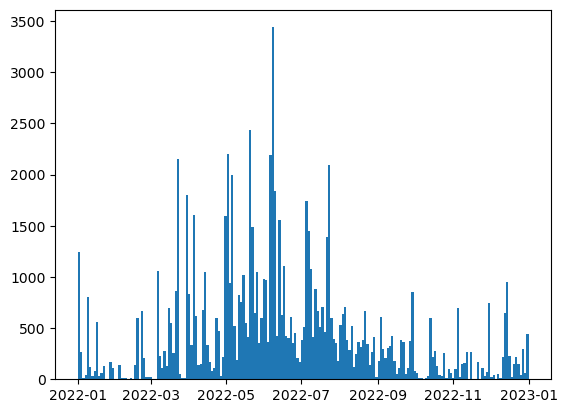

In [13]:
# Histograms are nice. What about cumulative plots?

plt.hist(l["Date"], bins=200)

(array([1.031e+03, 2.330e+02, 2.420e+02, 2.000e+00, 1.700e+01, 3.000e+00,
        4.300e+01, 3.070e+02, 4.970e+02, 7.000e+01, 5.200e+01, 1.500e+01,
        1.500e+01, 1.300e+01, 6.200e+01, 4.940e+02, 8.900e+01, 1.500e+01,
        2.300e+01, 3.600e+01, 8.600e+01, 4.700e+01, 1.000e+00, 1.000e+00,
        1.000e+00, 8.900e+01, 8.400e+01, 5.500e+01, 6.000e+01, 3.000e+00,
        3.000e+00, 1.000e+00, 6.000e+00, 6.600e+01, 6.900e+01, 9.000e+00,
        6.000e+00, 1.000e+00, 4.000e+00, 8.000e+00, 0.000e+00, 2.000e+00,
        5.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 4.690e+02,
        2.670e+02, 3.000e+00, 1.000e+00, 1.000e+00, 7.400e+02, 1.300e+02,
        7.000e+00, 1.500e+01, 0.000e+00, 1.200e+01, 1.600e+01, 8.000e+00,
        0.000e+00, 6.000e+00, 1.000e+00, 1.100e+02, 3.310e+02, 7.010e+02,
        1.080e+02, 6.700e+01, 7.800e+01, 5.700e+01, 2.190e+02, 8.000e+00,
        1.430e+02, 4.980e+02, 3.040e+02, 1.280e+02, 4.370e+02, 1.010e+02,
        6.900e+01, 6.120e+02, 1.907e+0

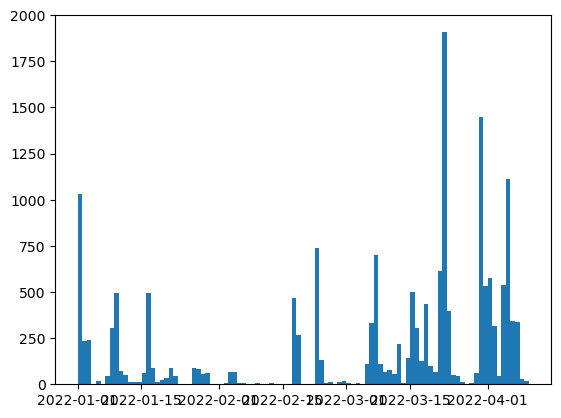

In [14]:
plt.hist(l["Date"], bins=pd.date_range(l["Date"][0], periods=100))

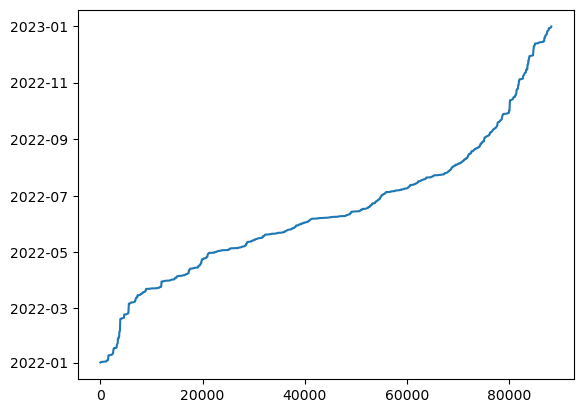

In [16]:
plt.plot(np.arange(len(l)), l["Date"].sort_values()) 

In [17]:
from matplotlib import ticker
# https://matplotlib.org/stable/api/ticker_api.html  Ugh, that's unreadable
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(l["Date"].sort_values(), np.arange(len(l))) 
plt.xlabel("Date")
plt.ylabel("Lightning strikes")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:d}"))

Error in callback <function _draw_all_if_interactive at 0x1262bb600> (for post_execute):


ValueError: Unknown format code 'd' for object of type 'float'

ValueError: Unknown format code 'd' for object of type 'float'

<Figure size 800x400 with 1 Axes>

In [ ]:
# Some trial-and-error and I find the format string ,.0f  will add commas and
# remove decimals from a floating point axis.

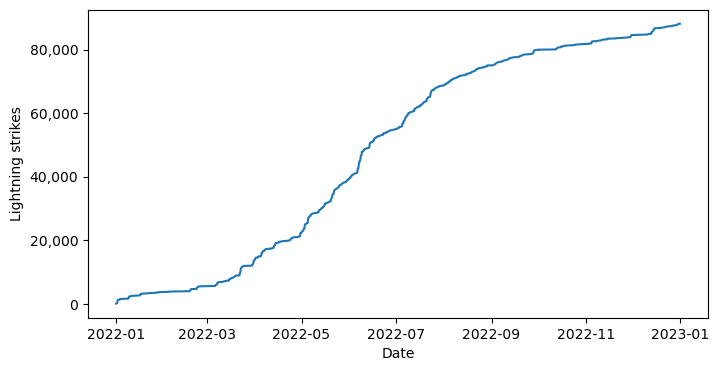

In [19]:
from matplotlib import ticker
# https://matplotlib.org/stable/api/ticker_api.html  Ugh, that's unreadable
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(l["Date"].sort_values(), range(len(l))) 
plt.xlabel("Date")
plt.ylabel("Lightning strikes")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

In [ ]:
# This is somewhat difficult to understand... 

Latitude and longitude of lightning strikes, and some histograms...

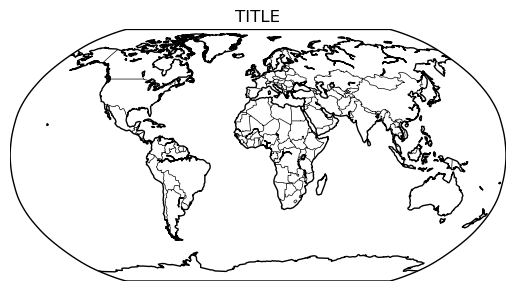

In [21]:
# https://pythonprogramming.net/plotting-maps-python-basemap/
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
def drawmap():
  
    m = Basemap(projection='robin',lon_0=0,resolution='c')

    m.drawcoastlines()
    m.drawcountries()
#    m.drawstates()

# This is the syntax to convert using the projection
# from long, lat to map coordinates
    x,y =    (0,0)  # DATA GOES HERE 
# And this hurricane track is just an x,y scatterplot
    m.plot(x,y)
# This decorates the map with a color background image of Earth
 #   m.bluemarble(alpha=0.1)
#    parallels = np.arange(0.,60,10.)
#    m.drawparallels(parallels,labels=[False,True,True,False])
#    meridians = np.arange(-20.,-140.,-10.)
#    m.drawmeridians(meridians,labels=[True,False,False,True])

    plt.title("TITLE")
    plt.show()
drawmap()

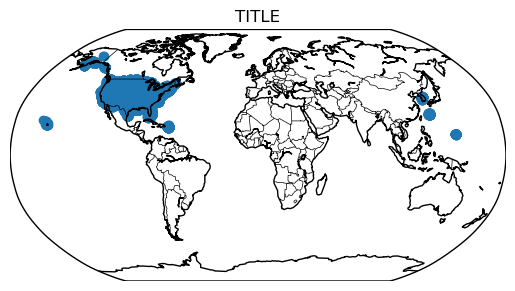

In [22]:
# https://pythonprogramming.net/plotting-maps-python-basemap/
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
def drawmap():

    m = Basemap(projection='robin',lon_0=0,resolution='c')
    
    m.drawcoastlines()
    m.drawcountries()
#    m.drawstates()

# This is the syntax to convert using the projection
# from long, lat to map coordinates
    x,y =    m(l.LON, l.LAT)  # DATA GOES HERE 
# And this hurricane track is just an x,y scatterplot
    m.scatter(x,y)
# This decorates the map with a color background image of Earth
 #   m.bluemarble(alpha=0.1)
#    parallels = np.arange(0.,60,10.)
#    m.drawparallels(parallels,labels=[False,True,True,False])
#    meridians = np.arange(-20.,-140.,-10.)
#    m.drawmeridians(meridians,labels=[True,False,False,True])

    plt.title("TITLE")
    plt.show()
drawmap()

In [23]:
wl = pd.read_csv("/Users/wltrimbl/Downloads/hail-2022.csv", skiprows=2)

In [24]:
len(wl)

11516156

In [25]:
sample =wl.sample(1000)

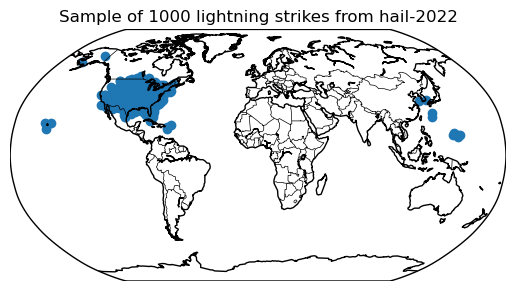

In [26]:
# https://pythonprogramming.net/plotting-maps-python-basemap/
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
def drawmap():

    m = Basemap(projection='robin',lon_0=0,resolution='c')
    
    m.drawcoastlines()
    m.drawcountries()
#    m.drawstates()

# This is the syntax to convert using the projection
# from long, lat to map coordinates
    x,y =    m(sample.LON, sample.LAT)  # DATA GOES HERE 
# And this hurricane track is just an x,y scatterplot
    m.scatter(x,y)
# This decorates the map with a color background image of Earth
 #   m.bluemarble(alpha=0.1)
#    parallels = np.arange(0.,60,10.)
#    m.drawparallels(parallels,labels=[False,True,True,False])
#    meridians = np.arange(-20.,-140.,-10.)
#    m.drawmeridians(meridians,labels=[True,False,False,True])

    plt.title("Sample of 1000 lightning strikes from hail-2022")
    plt.show()
drawmap()

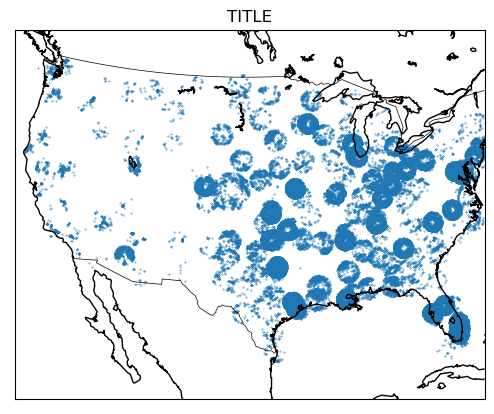

In [27]:
# https://pythonprogramming.net/plotting-maps-python-basemap/
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
def drawmap():

 #   m = Basemap(projection='robin',lon_0=0,resolution='c')
 
    m = Basemap(projection='aea', lat_0=35, lon_0 = -100,resolution='l',
                llcrnrlat=20,urcrnrlat=50,
                llcrnrlon=-120,urcrnrlon=-70)     
    m.drawcoastlines()
    m.drawcountries()
#    m.drawstates()

# This is the syntax to convert using the projection
# from long, lat to map coordinates
    x,y =    m(l.LON, l.LAT)  # DATA GOES HERE 
# And this hurricane track is just an x,y scatterplot
    m.scatter(x,y, s=0.1)
# This decorates the map with a color background image of Earth
 #   m.bluemarble(alpha=0.1)
#    parallels = np.arange(0.,60,10.)
#    m.drawparallels(parallels,labels=[False,True,True,False])
#    meridians = np.arange(-20.,-140.,-10.)
#    m.drawmeridians(meridians,labels=[True,False,False,True])

    plt.title("TITLE")
    plt.show()
drawmap()

Text(0, 0.5, 'Number of lightning events')

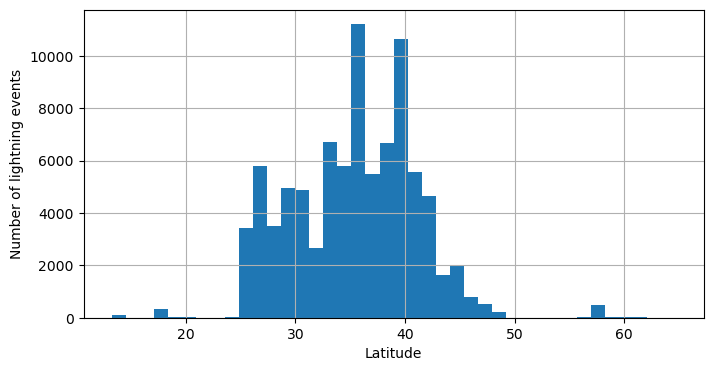

In [28]:
plt.figure(figsize=(8,4))
l.LAT.hist(bins=40)
plt.xlabel("Latitude")
plt.ylabel("Number of lightning events")

Text(0, 0.5, 'Number of lightning events')

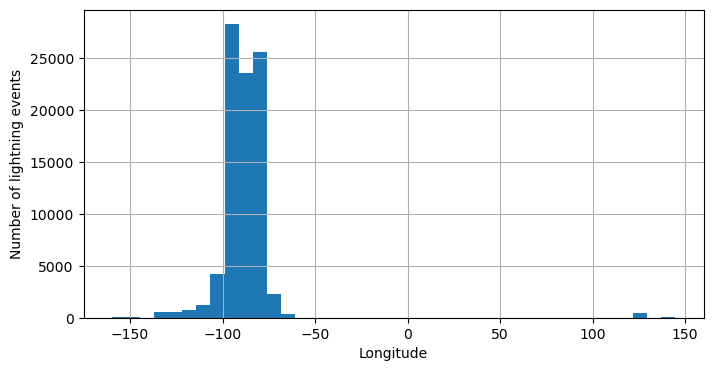

In [33]:
plt.figure(figsize=(8,4))
l.LON.hist(bins=40)
plt.xlabel("Longitude")
plt.ylabel("Number of lightning events")
#plt.xlim(-110, -70)

Text(0, 0.5, 'Number of lightning events')

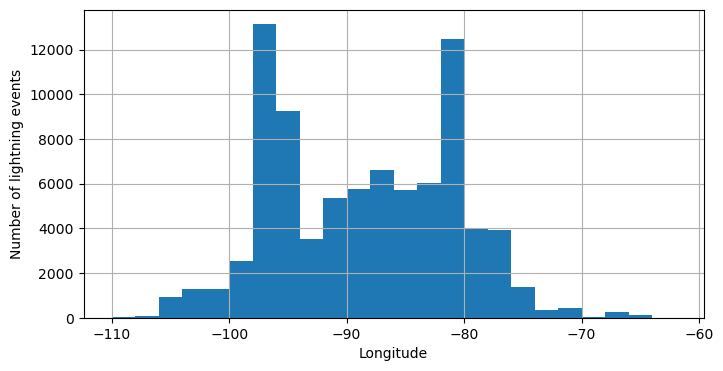

In [34]:
plt.figure(figsize=(8,4), )
l.LON.hist(bins=np.arange(-110, -60, 2))
plt.xlabel("Longitude")
plt.ylabel("Number of lightning events")

Text(0, 0.5, 'Number of lightning events')

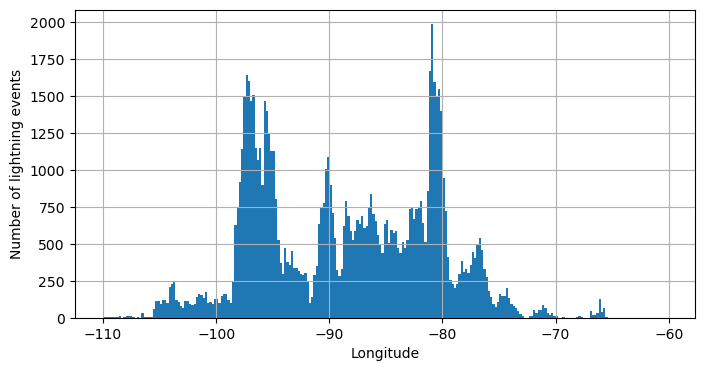

In [35]:
plt.figure(figsize=(8,4), )
l.LON.hist(bins=np.arange(-110, -60, .2))
plt.xlabel("Longitude")
plt.ylabel("Number of lightning events")

Text(0, 0.5, 'Number of lightning events')

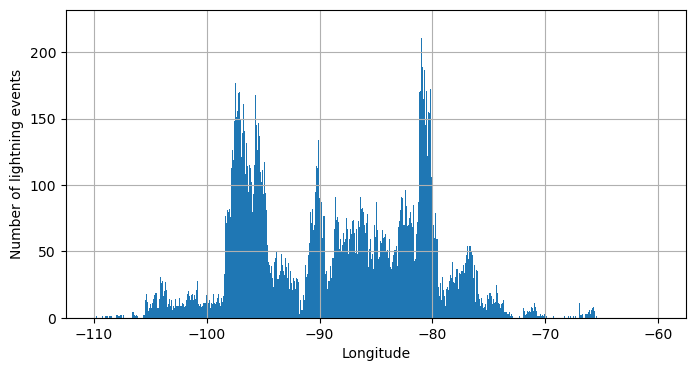

In [36]:
plt.figure(figsize=(8,4), )
l.LON.hist(bins=np.arange(-110, -60, .02))
plt.xlabel("Longitude")
plt.ylabel("Number of lightning events")

In [37]:
c, b = np.histogram(l.LON, bins =np.arange(-110, -60, .02) )
c, b

(array([0, 0, 1, ..., 0, 0, 0]),
 array([-110.  , -109.98, -109.96, ...,  -60.06,  -60.04,  -60.02]))

In [38]:
len(c), len(b)

(2499, 2500)

<BarContainer object of 2499 artists>

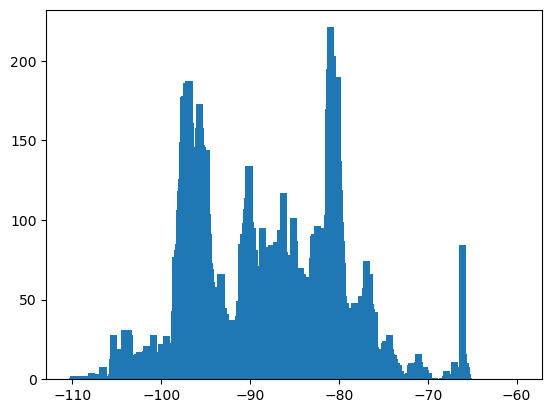

In [41]:
plt.bar(b[:-1], c)

In [42]:
# According to stackoverflow, the numpy equivalent of pd.value_counts() is
# https://stackoverflow.com/questions/70887293/equivalent-of-value-counts-of-pandas-in-numpy
unique, counts = np.unique(c, return_counts=True)
unique, counts, len(counts)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 129, 130, 131,
        132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159,
        160, 161, 162, 163, 164, 165, 168, 169, 170, 171, 172, 173, 176,
        177, 178, 179, 181, 183, 184, 186, 187, 189

In [44]:
len(c)

2499

Text(0.5, 1.0, 'The histogram of the histogram')

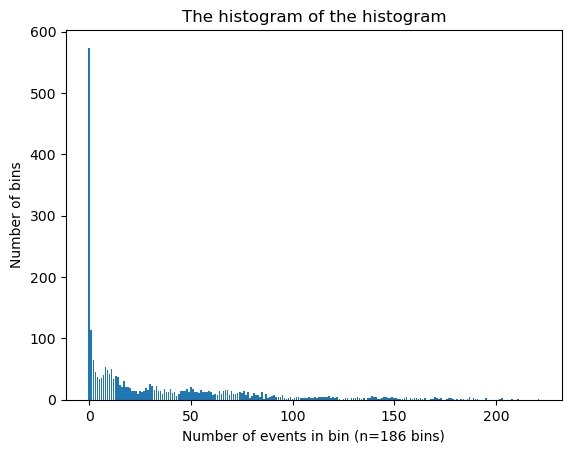

In [43]:
plt.bar(unique, counts)
plt.xlabel("Number of events in bin (n=186 bins)")
plt.ylabel("Number of bins")
plt.title("The histogram of the histogram")

In [45]:
# How many events were there... ?  88k... into 186 bins... 
len(l), len(l) / len(counts) 

(88178, 474.0752688172043)

In [ ]:
# That can't be right.  Something doesn't add up. 

In [46]:
sum(counts)

2499

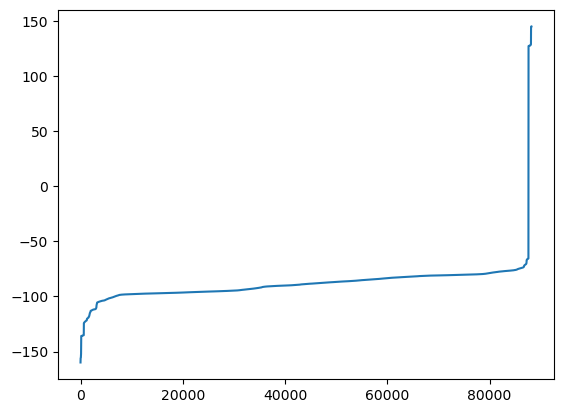

In [47]:
plt.plot(np.arange(len(l)), l.LON.sort_values())

(-110.0, -60.0)

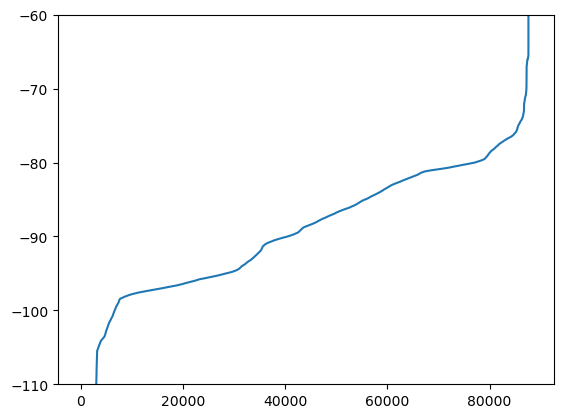

In [48]:
plt.plot(np.arange(len(l)), l.LON.sort_values())
plt.ylim(-110, -60)

In [49]:
# Ok, c, b was np.histogram... 
c.sum(), len(c)

(84495, 2499)

In [ ]:
# Ahhh, now I see.    The numpy.histogram has one point for every value, but
# the result of np.unique does not... because it's the histogram of the histogram!

In [50]:
sum(unique * counts)

84495

Can we over-histogram? 


In [51]:
c25k, b25k = np.histogram(l.LON, bins =np.arange(-110, -60, .002) )
c25k, b25k, len(b25k)

(array([0, 0, 0, ..., 0, 0, 0]),
 array([-110.   , -109.998, -109.996, ...,  -60.006,  -60.004,  -60.002]),
 25000)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (25000,) and arg 1 with shape (24999,).

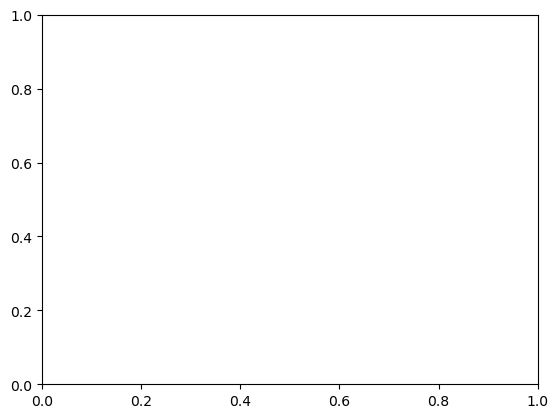

In [52]:
plt.bar(b25k, c25k)
plt.xlabel("Number of events in bin (n=25k bins)")
plt.ylabel("Number of bins")
plt.title("The histogram of the histogram")

Text(0.5, 1.0, 'The histogram of \nlightning by longitude in .002 degree bins')

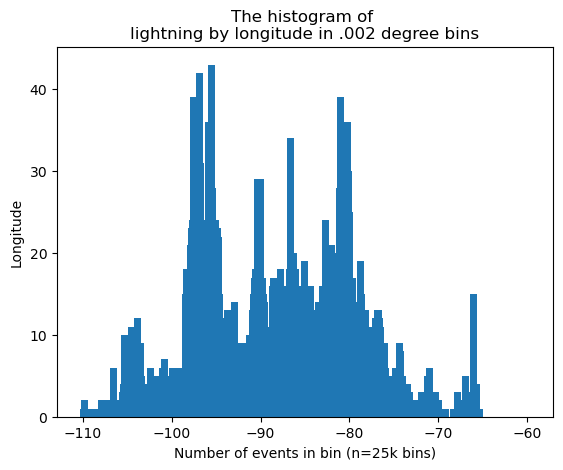

In [53]:
plt.bar(b25k[:-1], c25k)
plt.xlabel("Number of events in bin (n=25k bins)")
plt.ylabel("Longitude")
plt.title("The histogram of \nlightning by longitude in .002 degree bins")

In [54]:
unique25k, counts25k = np.unique(c25k, return_counts=True)
unique25k, counts25k, len(counts25k)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34,
        36, 39, 42, 43]),
 array([10118,  2872,  2116,  1539,  1305,  1186,  1039,   837,   667,
          602,   468,   372,   346,   283,   255,   180,   160,   134,
          127,    87,    77,    57,    35,    31,    27,    16,    15,
           12,     7,     7,     4,     5,     3,     2,     4,     2,
            1,     1]),
 38)

Text(0.5, 1.0, 'The histogram of the histogram')

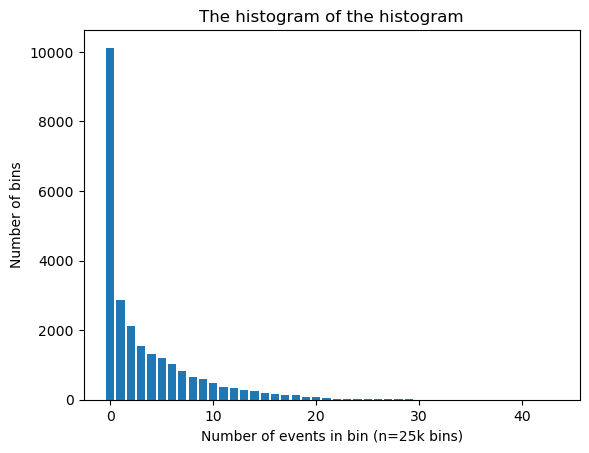

In [55]:
plt.bar(unique25k, counts25k)
plt.xlabel("Number of events in bin (n=25k bins)")
plt.ylabel("Number of bins")
plt.title("The histogram of the histogram")

In [57]:
import scipy.stats
uniform = scipy.stats.uniform.rvs(-110,50, size=85000)

In [58]:
cr25k, r25k = np.histogram(uniform, bins =np.arange(-110, -60, .002) )
cr25k, r25k, len(r25k)


(array([4, 5, 1, ..., 3, 5, 0]),
 array([-110.   , -109.998, -109.996, ...,  -60.006,  -60.004,  -60.002]),
 25000)

In [59]:
uniquerandom, countsrandom = np.unique(cr25k, return_counts=True)
uniquerandom, countsrandom, len(countsrandom)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([ 817, 2876, 4808, 5474, 4647, 3110, 1840,  851,  338,  162,   54,
          19,    2,    1]),
 14)

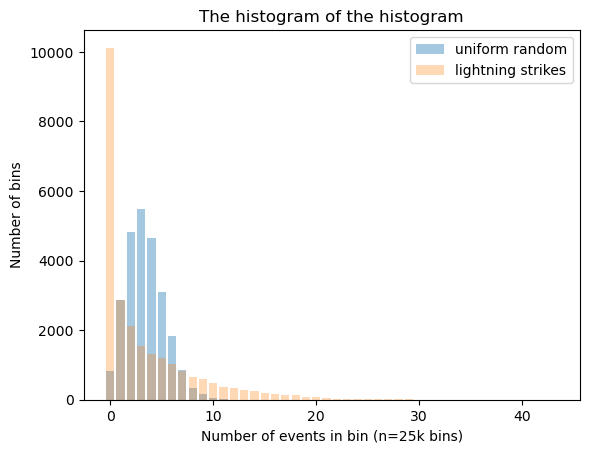

In [60]:
plt.bar(uniquerandom, countsrandom, alpha=0.4, label="uniform random")
plt.xlabel("Number of events in bin (n=25k bins)")
plt.ylabel("Number of bins")
plt.bar(unique25k, counts25k, alpha=0.3, label="lightning strikes")
plt.title("The histogram of the histogram")
plt.legend()

In [ ]:
# From this we can see that whatever is going on with lightning strikes, 
# they are not randomly distributed with longitude.  

In [ ]:
plt.figure(figsize=(8,4))
l.LAT[0:100].hist(bins=40)
plt.xlabel("Latitude")
plt.ylabel("Number of lightning events")